In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [51]:
dataFile = r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\new dataset\cellinfo_signals_v3.csv'

In [52]:
orgFile=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\signal_data_total_v3.csv'

In [53]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\MCM_densityPlots'

In [54]:
myData=pd.read_csv(dataFile)

In [55]:
myDataOrg=pd.read_csv(orgFile)

In [56]:
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20191203'}

In [57]:
for i, cell in myData.iterrows():
    myData.at[i,'decon']="d" in myData.loc[i,'file']


In [58]:
myData['p_age']=myData['physical age [min]'] / 60 +1

In [59]:
myDataOrg['day']=[f"d{x.split('_')[0]}" for x in myDataOrg.file]
myDataOrg = myDataOrg.astype({"day": 'object'})
set(myDataOrg['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [60]:
myDataOrg['age_track'] = (myDataOrg.DHB_len - 1) *10 / 60

In [61]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,...,nucleus_Otsu_erosion_inner_13x8_ch1,nucleus_Otsu_erosion_inner_13x8_ch2,nucleus_Otsu_erosion_inner_13x8_ch3,nucleus_Otsu_erosion_outer_13x8_volume,nucleus_Otsu_erosion_outer_13x8_ch1,nucleus_Otsu_erosion_outer_13x8_ch2,nucleus_Otsu_erosion_outer_13x8_ch3,day,decon,p_age
0,0,0,0,20191203_cell-00.czi,20191125-01-17,191125pcnat_dhbr_cdc6vxy01,678.301,200.931,MCM3,1,...,379110796.0,692173025.0,935544913,221201,1036065660,1881193437,2152830246,d20191203,False,6.666667
1,1,1,1,20191203_cell-01.czi,20191125-01-20,191125pcnat_dhbr_cdc6vxy01,1552.152,240.479,MCM3,1,...,928262052.0,479454971.0,2776081300,239801,1246753636,1078063100,3651188242,d20191203,False,NaN
2,2,2,2,20191203_cell-02.czi,20191125-01-23,191125pcnat_dhbr_cdc6vxy01,1131.436,318.530,MCM3,1,...,831896937.0,457256707.0,2741925173,235927,1101103949,1005378808,3485041772,d20191203,False,16.166667
3,3,3,3,20191203_cell-03.czi,20191125-01-25,191125pcnat_dhbr_cdc6vxy01,1650.585,324.968,MCM3,1,...,355031477.0,451306388.0,1405848914,176987,707110878,1137858410,2205521063,d20191203,False,1.500000
4,4,4,4,20191203_cell-04.czi,20191125-01-32,191125pcnat_dhbr_cdc6vxy01,1466.687,426.815,MCM3,1,...,442817486.0,585059149.0,990267188,270946,1275070823,1982458425,2634827813,d20191203,False,5.166667


In [78]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab2 (heterochromatin)']=='HP1beta')),:].copy()

myDataSel["euchro_20perc_ch2"]=myDataSel.nucleus_Otsu_ch2 - myDataSel.hetChrom_20perc_ch2

myDataSel["euchro_20perc_ch3"]=myDataSel.nucleus_Otsu_ch3 - myDataSel.hetChrom_20perc_ch3

myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab2 (heterochromatin)']=='HP1beta')),:].copy()

myDataSelnd["euchro_20perc_ch2"]=myDataSelnd.nucleus_Otsu_ch2 - myDataSelnd.hetChrom_20perc_ch2

myDataSelnd["euchro_20perc_ch3"]=myDataSelnd.nucleus_Otsu_ch3 - myDataSelnd.hetChrom_20perc_ch3

In [79]:
myDataSelorg=myDataOrg.loc[((myDataOrg.decon==True) & (myDataOrg['ab1 (heterochromatin)']=='HP1B')),:].copy()

myDataSelorg["euchro_20perc_ch2"]=myDataSelorg.nucleus_Otsu_ch2 - myDataSelorg.hetChrom_20perc_ch2

myDataSelorg["euchro_20perc_ch3"]=myDataSelorg.nucleus_Otsu_ch3 - myDataSelorg.hetChrom_20perc_ch3

myDataSelndorg=myDataSelorg.loc[((myDataSelorg.decon==False) & (myDataSelorg['ab1 (heterochromatin)']=='HP1B')),:].copy()

myDataSelndorg["euchro_20perc_ch2"]=myDataSelndorg.nucleus_Otsu_ch2 - myDataSelndorg.hetChrom_20perc_ch2

myDataSelndorg["euchro_20perc_ch3"]=myDataSelndorg.nucleus_Otsu_ch3 - myDataSelndorg.hetChrom_20perc_ch3

# with age modification

In [80]:
mod=0.3
myDataSel['mol_age_mod']=myDataSel['molecular age ']
myDataSel.loc[((myDataSel.p_age<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

### run the code below for not arbitrary number modification

In [75]:
myDataSel['mol_age_mod']=myDataSel['molecular age ']
myDataSel_mol_age_change=myDataSel.loc[((myDataSel.p_age<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']
myDataSel.loc[((myDataSel.p_age<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=-1*myDataSel['mol_age_mod']+np.max(myDataSel_mol_age_change)

## plot 1: het/nuc and eu/nuc


In [81]:
plot_num=1

<IPython.core.display.Javascript object>


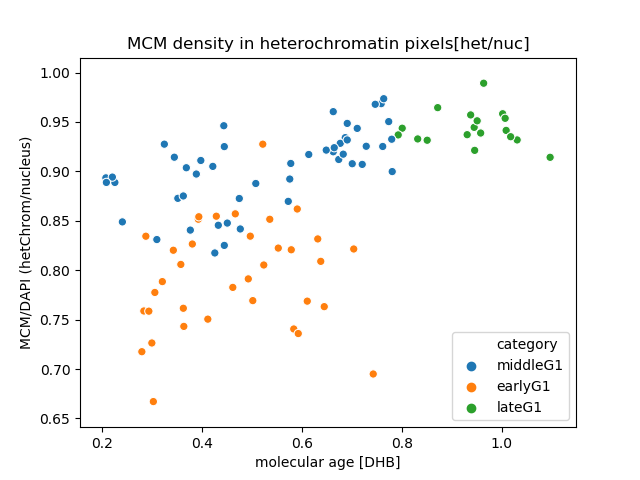

Text(0.5, 1.0, 'MCM density in heterochromatin pixels[het/nuc]')

In [82]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[('G1' in x for x in myDataSel.category),:], hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels[het/nuc]")

In [83]:
myDataSel.loc[myDataSel['temp']>1.5,:]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,...,nucleus_Otsu_erosion_outer_13x8_ch1,nucleus_Otsu_erosion_outer_13x8_ch2,nucleus_Otsu_erosion_outer_13x8_ch3,day,decon,p_age,euchro_20perc_ch2,euchro_20perc_ch3,mol_age_mod,temp


<IPython.core.display.Javascript object>


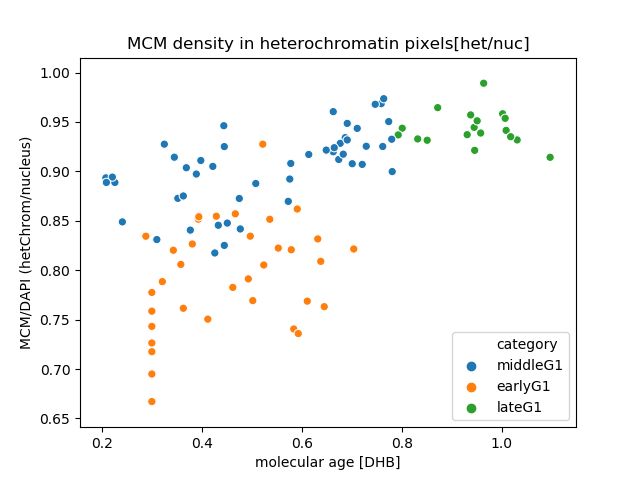

In [84]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[('G1' in x for x in myDataSel.category),:], hue='category')
title="het.nuc"
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels[het/nuc]")
plt.savefig(f'{bigDir}\\{plot_num}_{mod}_{title}.png')

<IPython.core.display.Javascript object>


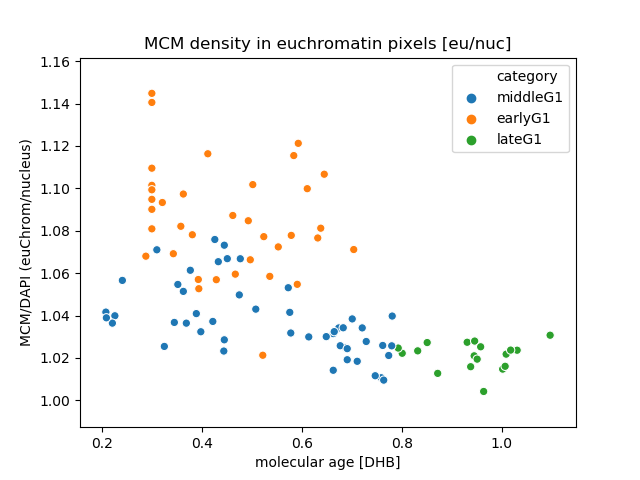

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu/nuc]')

In [85]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.euchro_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.euchro_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[('G1' in x for x in myDataSel.category),:], hue='category')
plt.ylabel("MCM/DAPI (euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu/nuc]")

## erosion analysis (9x9 wihth 5 iterations)

### plot 2: outer/nuc and inner/nuc

<IPython.core.display.Javascript object>


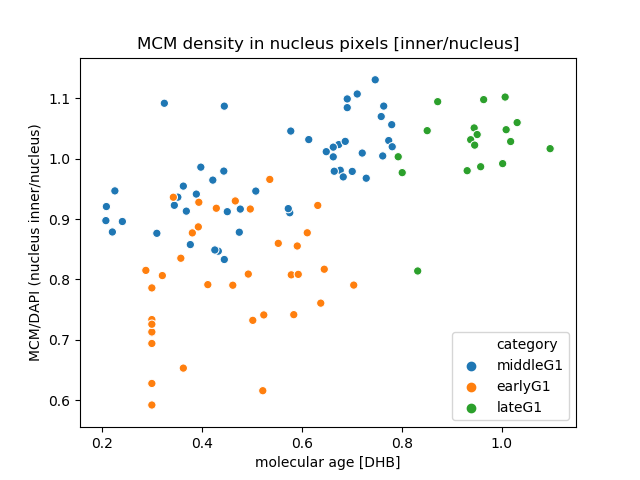

Text(0.5, 1.0, 'MCM density in nucleus pixels [inner/nucleus]')

In [86]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSel.nucleus_Otsu_erosion_inner_9x5_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (nucleus inner/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in nucleus pixels [inner/nucleus]")

<IPython.core.display.Javascript object>


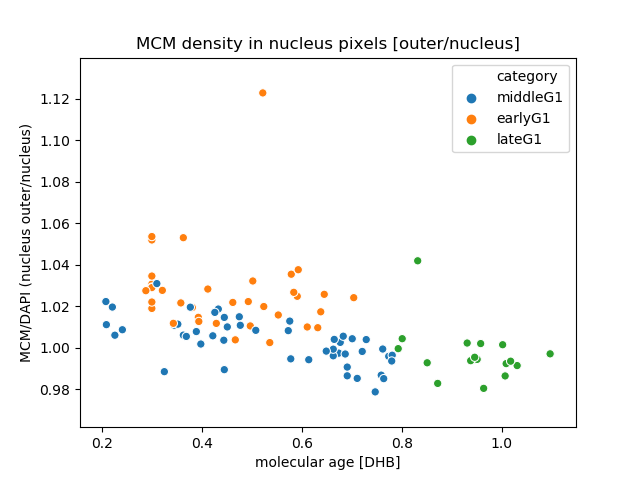

Text(0.5, 1.0, 'MCM density in nucleus pixels [outer/nucleus]')

In [87]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu_erosion_outer_9x5_ch2/myDataSel.nucleus_Otsu_erosion_outer_9x5_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (nucleus outer/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in nucleus pixels [outer/nucleus]")

### plot 3: het_outer / het and het_inner / het

<IPython.core.display.Javascript object>


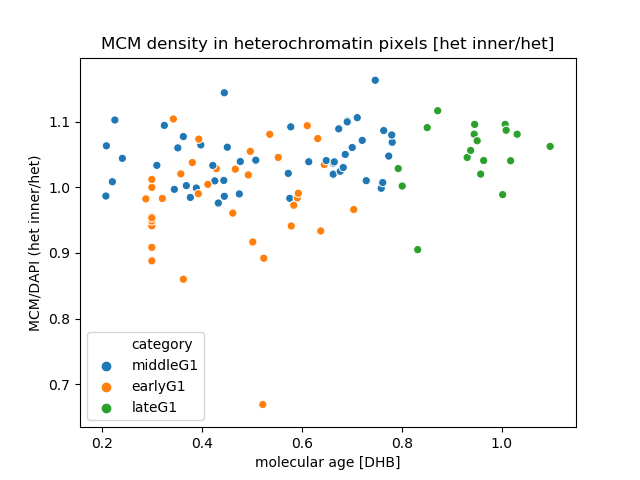

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het inner/het]')

In [88]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_inner_9x5_20_ch2/myDataSel.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het inner/het)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het inner/het]")

<IPython.core.display.Javascript object>


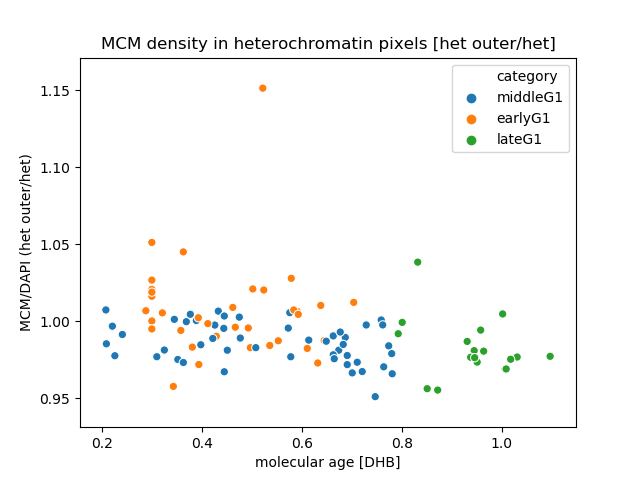

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het outer/het]')

In [89]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_outer_9x5_20_ch2/myDataSel.HetChrom_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/het)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het outer/het]")

### plot 4: eu_outer / eu and eu_inner / eu

In [90]:
myDataSel["euchro_erosion_inner_9x5_20_ch2"]=myDataSel.nucleus_Otsu_erosion_inner_9x5_ch2 - myDataSel.HetChrom_erosion_inner_9x5_20_ch2

In [91]:
myDataSel["euchro_erosion_inner_9x5_20_ch3"]=myDataSel.nucleus_Otsu_erosion_inner_9x5_ch3 - myDataSel.HetChrom_erosion_inner_9x5_20_ch3

In [92]:
myDataSel["euchro_erosion_outer_9x5_20_ch2"]=myDataSel.nucleus_Otsu_erosion_outer_9x5_ch2 - myDataSel.HetChrom_erosion_outer_9x5_20_ch2

In [93]:
myDataSel["euchro_erosion_outer_9x5_20_ch3"]=myDataSel.nucleus_Otsu_erosion_outer_9x5_ch3 - myDataSel.HetChrom_erosion_outer_9x5_20_ch3

<IPython.core.display.Javascript object>


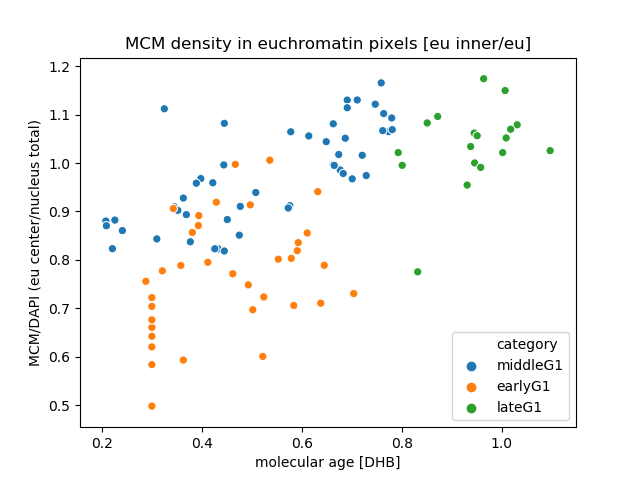

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu inner/eu]')

In [94]:
%matplotlib notebook

total= (myDataSel.euchro_20perc_ch2/myDataSel.euchro_20perc_ch3)
center=(myDataSel.euchro_erosion_inner_9x5_20_ch2/myDataSel.euchro_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (eu center/nucleus total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu inner/eu]")

<IPython.core.display.Javascript object>


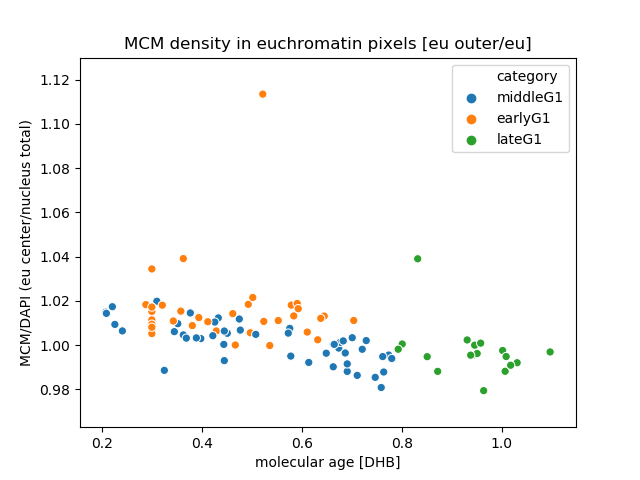

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu outer/eu]')

In [95]:
%matplotlib notebook

total= (myDataSel.euchro_20perc_ch2/myDataSel.euchro_20perc_ch3)
center=(myDataSel.euchro_erosion_outer_9x5_20_ch2/myDataSel.euchro_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (eu center/nucleus total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu outer/eu]")

### plot 5: het_outer/outer and eu_outer/outer

<IPython.core.display.Javascript object>


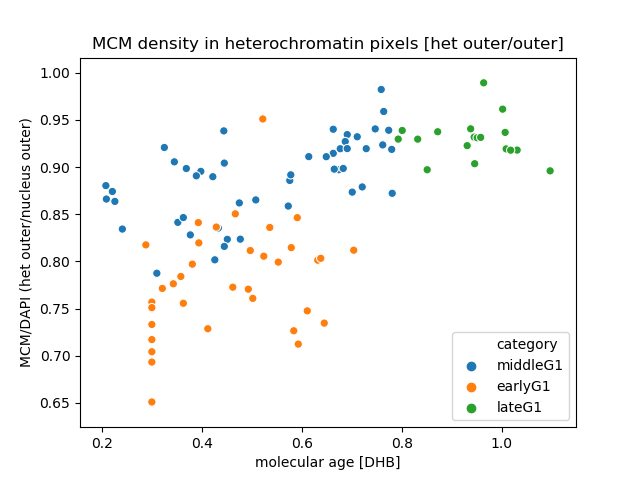

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het outer/outer]')

In [96]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_erosion_outer_9x5_ch2/myDataSel.nucleus_Otsu_erosion_outer_9x5_ch3)
center=(myDataSel.HetChrom_erosion_outer_9x5_20_ch2/myDataSel.HetChrom_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus outer)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het outer/outer]")

<IPython.core.display.Javascript object>


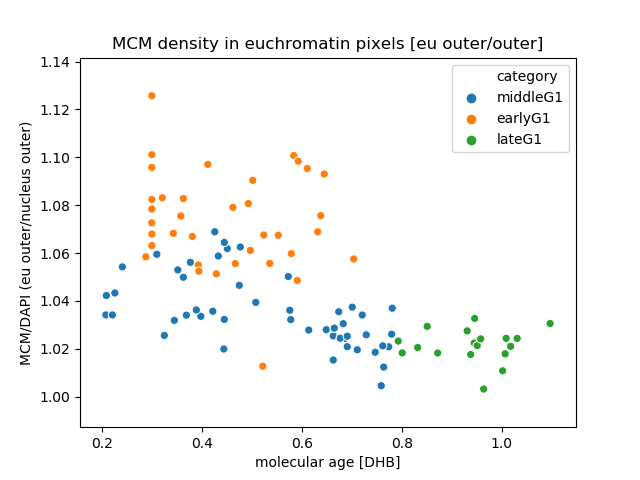

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu outer/outer]')

In [97]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_erosion_outer_9x5_ch2/myDataSel.nucleus_Otsu_erosion_outer_9x5_ch3)
center=(myDataSel.euchro_erosion_outer_9x5_20_ch2/myDataSel.euchro_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (eu outer/nucleus outer)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu outer/outer]")

### plot 6: het_inner / inner and eu_inner / inner

<IPython.core.display.Javascript object>


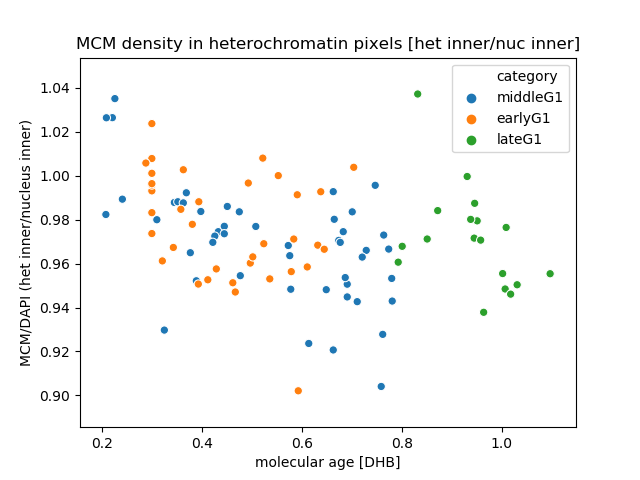

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het inner/nuc inner]')

In [98]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSel.nucleus_Otsu_erosion_inner_9x5_ch3)
center=(myDataSel.HetChrom_erosion_inner_9x5_20_ch2/myDataSel.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het inner/nucleus inner)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het inner/nuc inner]")

<IPython.core.display.Javascript object>


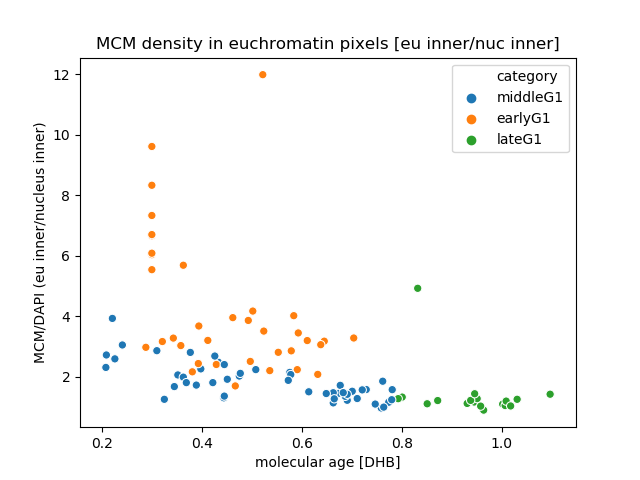

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu inner/nuc inner]')

In [99]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSel.nucleus_Otsu_erosion_inner_9x5_ch3)
center=(myDataSel.euchro_erosion_inner_9x5_20_ch3/myDataSel.euchro_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (eu inner/nucleus inner)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu inner/nuc inner]")

# original dataset with age modification

In [365]:
mod=0.3
myDataSelorg['mol_age_mod']=myDataSelorg.molecularAge_ratio
myDataSelorg.loc[((myDataSelorg.age_track<1.5) & (myDataSelorg.category=='earlyG1')),'mol_age_mod']=mod

### run the code below for not arbitrary number modification

In [366]:
myDataSelorg['mol_age_mod']=myDataSelorg.molecularAge_ratio
myDataSelorg_mol_age_change=myDataSelorg.loc[((myDataSelorg.age_track<1.5) & (myDataSelorg.category=='earlyG1')),'mol_age_mod']
myDataSelorg.loc[((myDataSelorg.age_track<1.5) & (myDataSelorg.category=='earlyG1')),'mol_age_mod']=-1*myDataSelorg['mol_age_mod']+np.max(myDataSelorg_mol_age_change)

## plot 1: het/nuc and eu/nuc


<IPython.core.display.Javascript object>


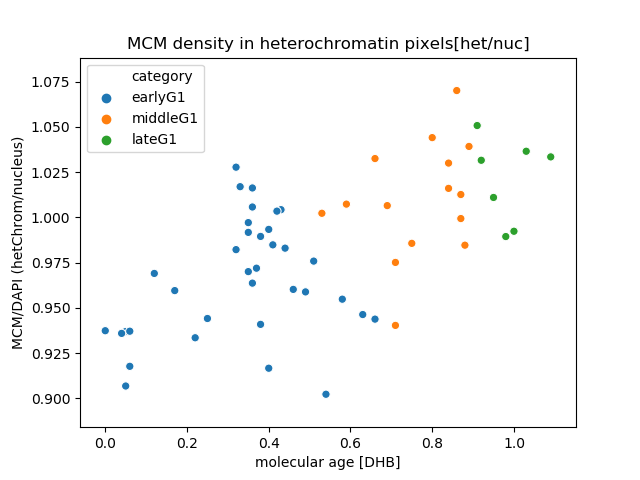

Text(0.5, 1.0, 'MCM density in heterochromatin pixels[het/nuc]')

In [367]:
%matplotlib notebook

myDataSelorg['temp']=(myDataSelorg.hetChrom_20perc_ch2/myDataSelorg.nucleus_Otsu_ch2)/(myDataSelorg.hetChrom_20perc_ch3/myDataSelorg.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels[het/nuc]")

<IPython.core.display.Javascript object>


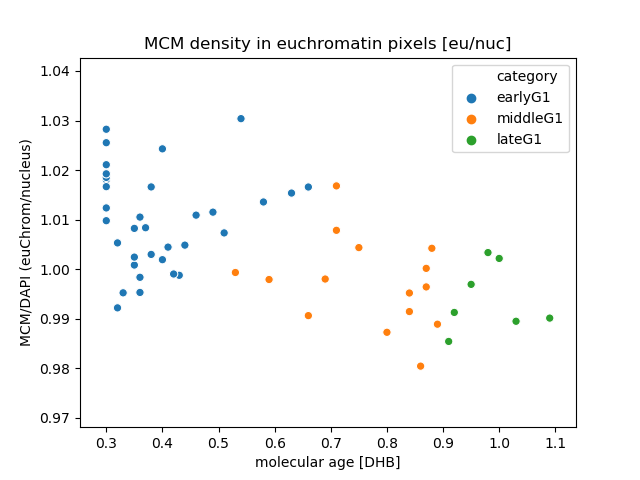

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu/nuc]')

In [222]:
%matplotlib notebook

myDataSelorg['temp']=(myDataSelorg.euchro_20perc_ch2/myDataSelorg.nucleus_Otsu_ch2)/(myDataSelorg.euchro_20perc_ch3/myDataSelorg.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (euChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu/nuc]")

## erosion analysis (9x9 wihth 5 iterations)

### plot 2: outer/nuc and inner/nuc

<IPython.core.display.Javascript object>


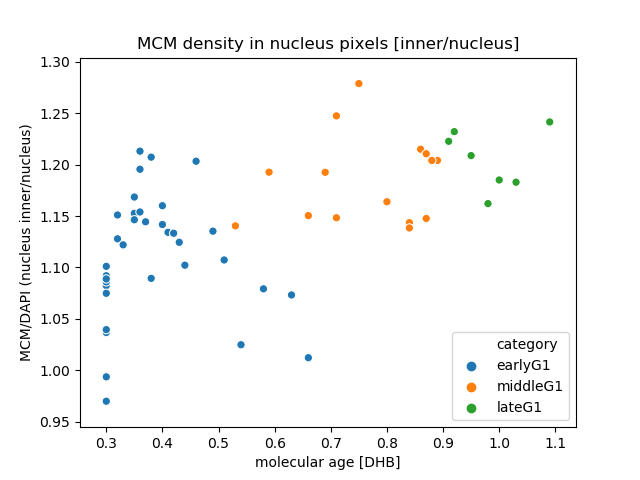

Text(0.5, 1.0, 'MCM density in nucleus pixels [inner/nucleus]')

In [223]:
%matplotlib notebook

total= (myDataSelorg.nucleus_Otsu_ch2/myDataSelorg.nucleus_Otsu_ch3)
center=(myDataSelorg.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSelorg.nucleus_Otsu_erosion_inner_9x5_ch3)

myDataSelorg['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (nucleus inner/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in nucleus pixels [inner/nucleus]")

<IPython.core.display.Javascript object>


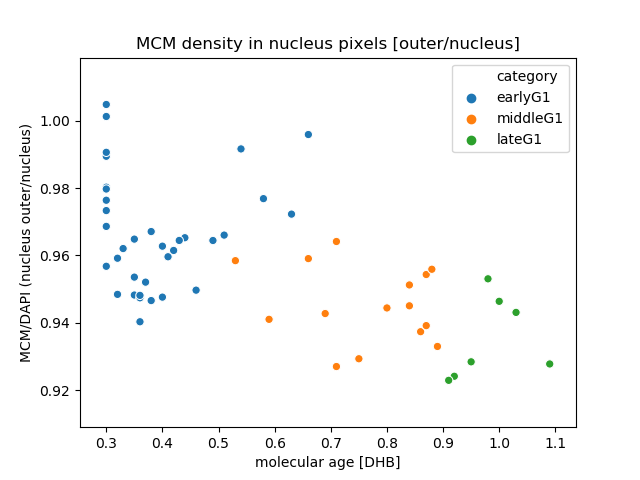

Text(0.5, 1.0, 'MCM density in nucleus pixels [outer/nucleus]')

In [225]:
%matplotlib notebook

total= (myDataSelorg.nucleus_Otsu_ch2/myDataSelorg.nucleus_Otsu_ch3)
center=(myDataSelorg.nucleus_Otsu_erosion_outer_9x5_ch2/myDataSelorg.nucleus_Otsu_erosion_outer_9x5_ch3)

myDataSelorg['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (nucleus outer/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in nucleus pixels [outer/nucleus]")

### plot 3: het_outer / het and het_inner / het

<IPython.core.display.Javascript object>


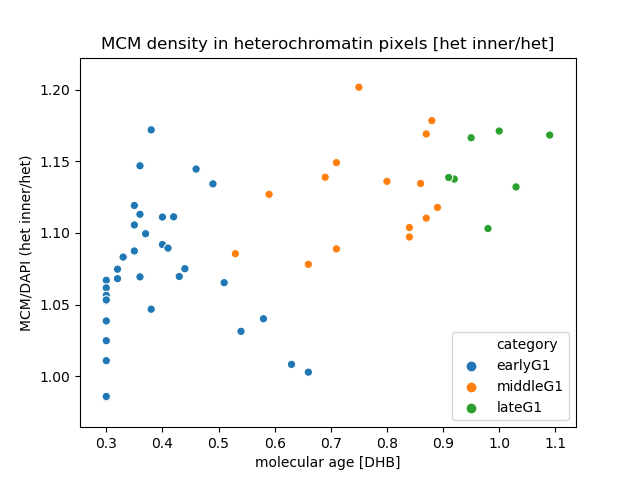

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het inner/het]')

In [226]:
%matplotlib notebook

total= (myDataSelorg.hetChrom_20perc_ch2/myDataSelorg.hetChrom_20perc_ch3)
center=(myDataSelorg.HetChrom_erosion_inner_9x5_20_ch2/myDataSelorg.HetChrom_erosion_inner_9x5_20_ch3)

myDataSelorg['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het inner/het)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het inner/het]")

<IPython.core.display.Javascript object>


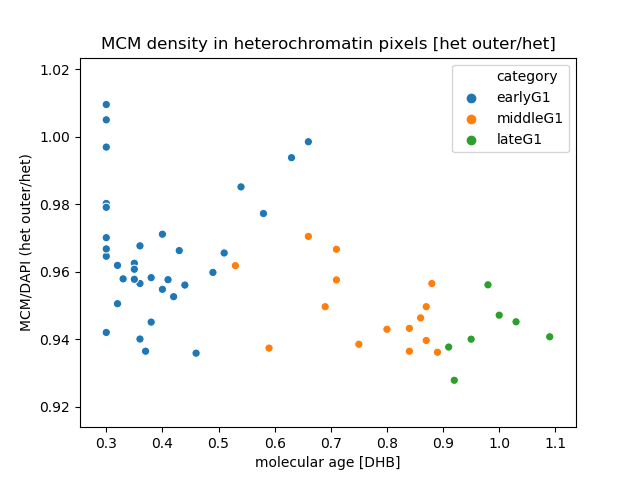

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het outer/het]')

In [227]:
%matplotlib notebook

total= (myDataSelorg.hetChrom_20perc_ch2/myDataSelorg.hetChrom_20perc_ch3)
center=(myDataSelorg.HetChrom_erosion_outer_9x5_20_ch2/myDataSelorg.HetChrom_erosion_outer_9x5_20_ch3)

myDataSelorg['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het outer/het)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het outer/het]")

### plot 4: eu_outer / eu and eu_inner / eu

In [228]:
myDataSelorg["euchro_erosion_inner_9x5_20_ch2"]=myDataSelorg.nucleus_Otsu_erosion_inner_9x5_ch2 - myDataSelorg.HetChrom_erosion_inner_9x5_20_ch2

In [229]:
myDataSelorg["euchro_erosion_inner_9x5_20_ch3"]=myDataSelorg.nucleus_Otsu_erosion_inner_9x5_ch3 - myDataSelorg.HetChrom_erosion_inner_9x5_20_ch3

In [230]:
myDataSelorg["euchro_erosion_outer_9x5_20_ch2"]=myDataSelorg.nucleus_Otsu_erosion_outer_9x5_ch2 - myDataSelorg.HetChrom_erosion_outer_9x5_20_ch2

In [231]:
myDataSelorg["euchro_erosion_outer_9x5_20_ch3"]=myDataSelorg.nucleus_Otsu_erosion_outer_9x5_ch3 - myDataSelorg.HetChrom_erosion_outer_9x5_20_ch3

<IPython.core.display.Javascript object>


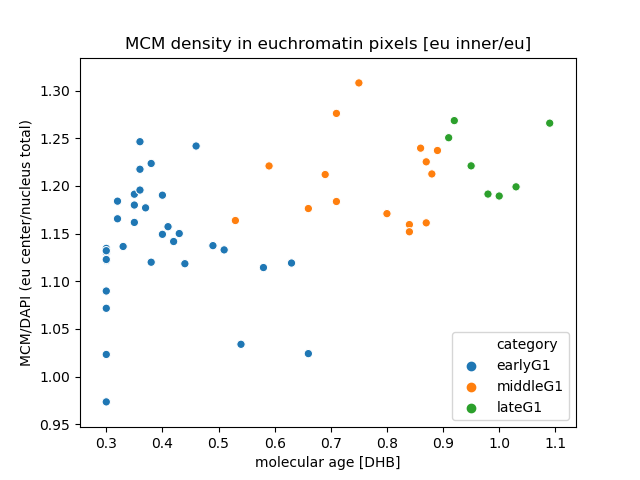

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu inner/eu]')

In [232]:
%matplotlib notebook

total= (myDataSelorg.euchro_20perc_ch2/myDataSelorg.euchro_20perc_ch3)
center=(myDataSelorg.euchro_erosion_inner_9x5_20_ch2/myDataSelorg.euchro_erosion_inner_9x5_20_ch3)

myDataSelorg['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (eu center/nucleus total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu inner/eu]")

<IPython.core.display.Javascript object>


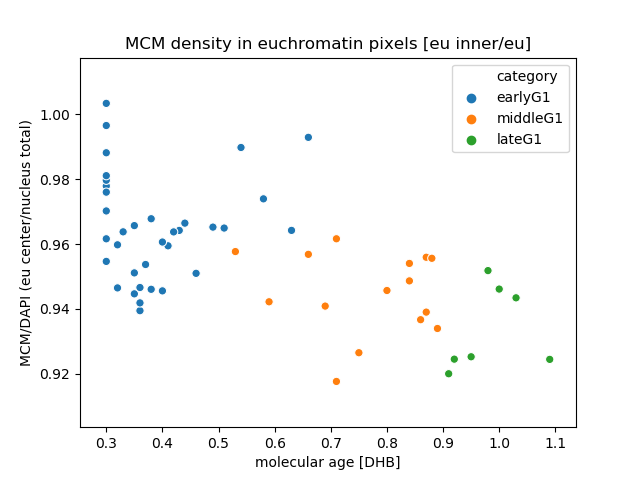

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu inner/eu]')

In [233]:
%matplotlib notebook

total= (myDataSelorg.euchro_20perc_ch2/myDataSelorg.euchro_20perc_ch3)
center=(myDataSelorg.euchro_erosion_outer_9x5_20_ch2/myDataSelorg.euchro_erosion_outer_9x5_20_ch3)

myDataSelorg['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp',data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (eu center/nucleus total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu inner/eu]")

### plot 5: het_outer/outer and eu_outer/outer

<IPython.core.display.Javascript object>


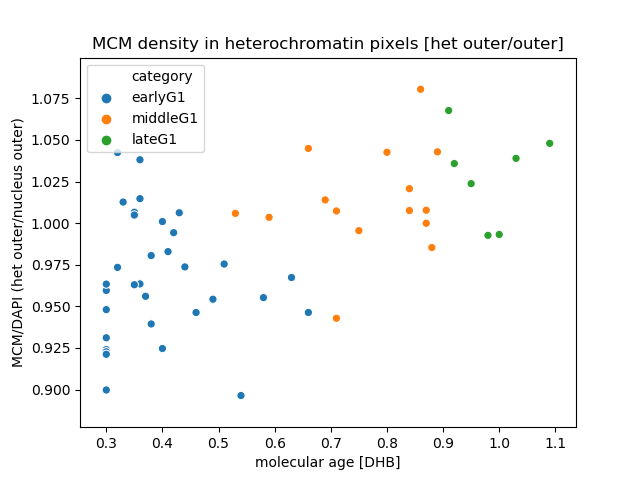

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het outer/outer]')

In [235]:
%matplotlib notebook

total= (myDataSelorg.nucleus_Otsu_erosion_outer_9x5_ch2/myDataSelorg.nucleus_Otsu_erosion_outer_9x5_ch3)
center=(myDataSelorg.HetChrom_erosion_outer_9x5_20_ch2/myDataSelorg.HetChrom_erosion_outer_9x5_20_ch3)

myDataSelorg['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus outer)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het outer/outer]")

<IPython.core.display.Javascript object>


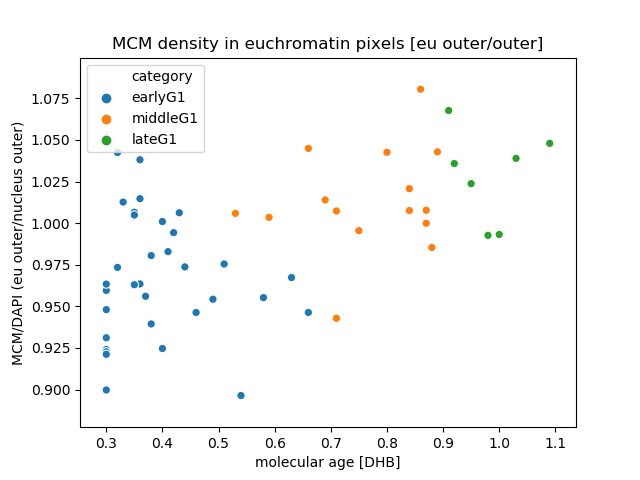

Text(0.5, 1.0, 'MCM density in euchromatin pixels [eu outer/outer]')

In [237]:
%matplotlib notebook

total= (myDataSelorg.nucleus_Otsu_erosion_outer_9x5_ch2/myDataSelorg.nucleus_Otsu_erosion_outer_9x5_ch3)
center=(myDataSelorg.euchro_erosion_outer_9x5_20_ch2/myDataSelorg.euchro_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (eu outer/nucleus outer)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu outer/outer]")

### plot 6: het_inner / inner and eu_inner / inner

<IPython.core.display.Javascript object>


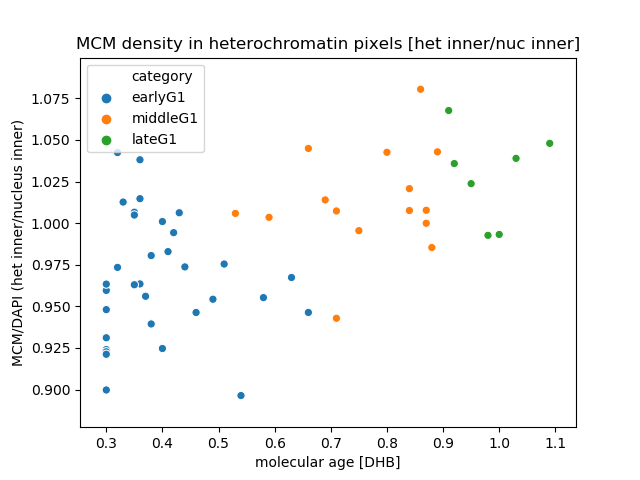

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het inner/nuc inner]')

In [238]:
%matplotlib notebook

total= (myDataSelorg.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSelorg.nucleus_Otsu_erosion_inner_9x5_ch3)
center=(myDataSelorg.HetChrom_erosion_inner_9x5_20_ch2/myDataSelorg.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het inner/nucleus inner)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het inner/nuc inner]")

In [377]:
%matplotlib notebook

total= (myDataSelorg.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSelorg.nucleus_Otsu_erosion_inner_9x5_ch3)
center=(myDataSelorg.euchro_erosion_inner_9x5_20_ch3/myDataSelorg.euchro_erosion_inner_9x5_20_ch3)

myDataSelorg['temp']= center/total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelorg.loc[((myDataSelorg.day!='d20190625') & (myDataSelorg.day!='d201907012') & 
                                                                   ['G1' in x for x in myDataSelorg.category]),:],hue='category')
plt.ylabel("MCM/DAPI (eu inner/nucleus inner)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in euchromatin pixels [eu inner/nuc inner]")

AttributeError: 'DataFrame' object has no attribute 'euchro_erosion_inner_9x5_20_ch3'

<IPython.core.display.Javascript object>


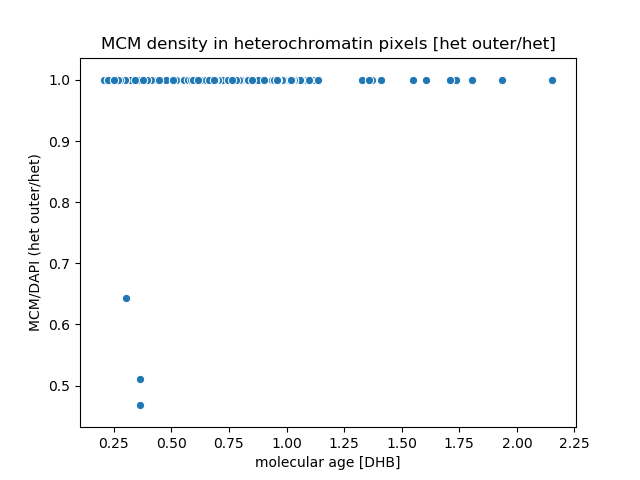

Text(0.5, 1.0, 'MCM density in heterochromatin pixels [het outer/het]')

In [412]:
%matplotlib notebook

total= (myData.hetChrom_20perc_ch2)
center=(myData.HetChrom_erosion_outer_9x5_20_ch2)+(myData.HetChrom_erosion_inner_9x5_20_ch2)


myData['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myData)
plt.ylabel("MCM/DAPI (het outer/het)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels [het outer/het]")

In [379]:
myData['het_expected_ch2']=myData['HetChrom_erosion_inner_9x5_20_ch2']+myData['HetChrom_erosion_outer_9x5_20_ch2']

In [380]:
myData['het_match_ch2']=False

In [387]:
myData.loc[(myData['het_expected_ch2']==myData['hetChrom_20perc_ch2']), 'het_match_ch2']=True

In [382]:
myData['het_ratio_ch2']=myData['het_expected_ch2']/myData['hetChrom_20perc_ch2']

In [384]:
myData['het_match_ch2'].value_counts()

True     197
False    127
Name: het_match_ch2, dtype: int64

In [417]:
myData['het_expected_ch3']=myData['HetChrom_erosion_inner_9x5_20_ch3']+myData['HetChrom_erosion_outer_9x5_20_ch3']

In [432]:
myData['nuc_expected_ch3']=myData['nucleus_Otsu_erosion_inner_9x5_ch3']+myData['nucleus_Otsu_erosion_outer_9x5_ch3']

In [435]:
myData['nuc_ratio_ch3']=myData['nuc_expected_ch3']/myData['nucleus_Otsu_ch3']

In [433]:
myData['nuc_expected_ch2']=myData['nucleus_Otsu_erosion_inner_9x5_ch2']+myData['nucleus_Otsu_erosion_outer_9x5_ch2']

In [434]:
myData['nuc_ratio_ch2']=myData['nuc_expected_ch2']/myData['nucleus_Otsu_ch2']

In [436]:
for i, cell in myData.iterrows():
    myData.at[i, 'het_match_ch2']=int(myData.at[i, 'het_ratio_ch2'])
    myData.at[i, 'het_match_ch3']=int(myData.at[i, 'het_ratio_ch3'])
    myData.at[i, 'nuc_match_ch2']=int(myData.at[i, 'nuc_ratio_ch2'])
    myData.at[i, 'nuc_match_ch3']=int(myData.at[i, 'nuc_ratio_ch3'])

In [427]:
myData['het_match_ch2'].value_counts()

1    263
0     61
Name: het_match_ch2, dtype: int64

In [428]:
myData['het_match_ch3'].value_counts()

1    261
0     63
Name: het_match_ch3, dtype: int64

In [437]:
myData['nuc_match_ch2'].value_counts()

1.0    247
0.0     77
Name: nuc_match_ch2, dtype: int64

In [438]:
myData['nuc_match_ch3'].value_counts()

1.0    241
0.0     83
Name: nuc_match_ch3, dtype: int64

In [391]:
myData['het_match_ch3']=False

In [406]:
myData.loc[myData['het_expected_ch2']==True&myData['het_expected_ch3']==True, 'het_match_ch3']=True

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [393]:
myData['het_ratio_ch3']=myData['het_expected_ch3']/myData['hetChrom_20perc_ch3']

In [394]:
myData.loc[myData['het_ratio_ch3']!=1.000000000, 'het_match_ch3']


29     False
31     False
162    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
174    False
175    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
185    False
186    False
189    False
191    False
192    False
193    False
194    False
195    False
196    False
199    False
       ...  
286    False
290    False
291    False
292    False
294    False
295    False
296    False
297    False
298    False
299    False
302    False
303    False
304    False
305    False
306    False
307    False
308    False
309    False
310    False
311    False
313    False
314    False
315    False
316    False
317    False
318    False
320    False
321    False
322    False
323    False
Name: het_match_ch3, Length: 125, dtype: bool

In [395]:
myData['het_match_ch3'].value_counts()

True     199
False    125
Name: het_match_ch3, dtype: int64

In [397]:
myData['ch2_3']=False

In [398]:
myData.loc[myData['het_match_ch3']==myData['het_match_ch2'], 'ch2_3']=True

In [402]:
mysel=myData[['file', 'het_match_ch3', 'het_match_ch2', 'ch2_3']]

In [403]:
mysel.to_csv(r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\cell_match.csv')